Machine Learning Model for Dance Data

Correlation Coefficient of Dance Rating and If played an instrument or not, change yes and no to binary

Correlation between sports participation and dance rating

This predict will give a prediction of how much someone would enjoy the dance scene and how they will progress.

Do follows progress quicker than leads?
Is a certain dance style have people reach a higher level sooner?
Does attendance have a correlation with overall dance rating?
Does location of dance scene have an affect on dance rating and level? Do Floridians like the dance scene more? Do people in the west progress faster?
Create Train and Test data to predict how much someone would enjoy the dance scene
Model to Predict how soon you will become a certain level based on your background, if I am a female who is 25 and has prior sports and instrument experience, I am predicted to become advanced afterhow many years?
Dance Rating by Region/State/Country

In [687]:
import pandas as pd

# df = pd.read_csv('bins_data.csv')
df = pd.read_csv('bins_data_cleaned.csv')

In [688]:
df['Continent']

0      North America
1             Europe
2      North America
3      North America
4      North America
           ...      
105    North America
106    North America
107    North America
108    North America
109    North America
Name: Continent, Length: 110, dtype: object

In [689]:
df = df.dropna()

In [690]:
df_ml = df
df_ml.columns

Index(['Unnamed: 0', 'Gender', 'City', 'Location', 'Friendly Follows?',
       'Friendly Leads?', 'Attendance', 'Level', 'Dance Lessons', 'Opposite',
       'Most Interested', 'Dance Scene', 'Years in Dance Scene',
       'Played a Sport', 'Played an instrument', 'Age', 'Zodiac Sign',
       'Timestamp', 'Leader or Follower', 'Dance Rating', 'Average Experience',
       'Year started dancing', 'Starting Age', 'Experience Bins', 'Region',
       'Continent'],
      dtype='object')

In [691]:

# change the data strs to numeric reps
df_ml = df_ml.replace({'Gender': 'Male'}, 0)
df_ml = df_ml.replace({'Gender': 'Female'}, 1)
df_ml = df_ml.replace({'Gender': 'Gender Queer'}, 2)
df_ml = df_ml.replace({'Played a Sport': 'Yes'}, 1)
df_ml = df_ml.replace({'Played a Sport': 'No'}, 0)
df_ml = df_ml.replace({'Played an instrument': 'Yes'}, 1)
df_ml = df_ml.replace({'Played an instrument': 'No'}, 0)

attendance_list = df_ml['Attendance'].unique()
count = 0

for x in df['Attendance'].unique():
    
    df_ml = df_ml.replace({'Attendance': x}, count)
    count += 1

count = 0
for x in df['Level'].unique():
    
    df_ml = df_ml.replace({'Level': x}, count)
    count += 1
    
count = 0
for x in df['Dance Scene'].unique():
    
    df_ml = df_ml.replace({'Dance Scene': x}, count)
    count += 1
    
count = 0
for x in df['Years in Dance Scene'].unique():
    
    df_ml = df_ml.replace({'Years in Dance Scene': x}, count)
    count += 1
    
count = 0
# lead - 0, follow - 1
for x in df['Leader or Follower'].unique():
    
    df_ml = df_ml.replace({'Leader or Follower': x}, count)
    count += 1
    
count = 0
for x in df['Zodiac Sign'].unique():
    
    df_ml = df_ml.replace({'Zodiac Sign': x}, count)
    count += 1
    
count = 0
for x in df['Friendly Leads?'].unique():
    
    df_ml = df_ml.replace({'Friendly Leads?': x}, count)
    count += 1
    
count = 0
for x in df['Friendly Follows?'].unique():
    
    df_ml = df_ml.replace({'Friendly Follows?': x}, count)
    count += 1
    
count = 0
for x in df['Opposite'].unique():
    
    df_ml = df_ml.replace({'Opposite': x}, count)
    count += 1
    
count = 0
for x in df['Dance Scene'].unique():
    
    df_ml = df_ml.replace({'Dance Scene': x}, count)
    count += 1
    
count = 0
for x in df['Region'].unique():
    
    df_ml = df_ml.replace({'Region': x}, count)
    count += 1
    
count = 0
for x in df['Most Interested'].unique():
    
    df_ml = df_ml.replace({'Most Interested': x}, count)
    count += 1
    
count = 0
for x in df['Continent'].unique():
    
    df_ml = df_ml.replace({'Continent': x}, count)
    count += 1
count = 0
for x in df['City'].unique():
    
    df_ml = df_ml.replace({'City': x}, count)
    count += 1
    


In [692]:
df_ml.columns

Index(['Unnamed: 0', 'Gender', 'City', 'Location', 'Friendly Follows?',
       'Friendly Leads?', 'Attendance', 'Level', 'Dance Lessons', 'Opposite',
       'Most Interested', 'Dance Scene', 'Years in Dance Scene',
       'Played a Sport', 'Played an instrument', 'Age', 'Zodiac Sign',
       'Timestamp', 'Leader or Follower', 'Dance Rating', 'Average Experience',
       'Year started dancing', 'Starting Age', 'Experience Bins', 'Region',
       'Continent'],
      dtype='object')

In [693]:
# df_ml1 = df_ml[['Gender', 'City', 'Location', 'Friendly Follows?',
#        'Friendly Leads?', 'Attendance', 'Level', 'Dance Lessons', 'Opposite',
#        'Most Interested', 'Dance Scene', 'Years in Dance Scene',
#        'Played a Sport', 'Played an instrument', 'Age', 'Zodiac Sign',
#        'Timestamp', 'Leader or Follower', 'Dance Rating', 'Average Experience',
#        'Year started dancing', 'Starting Age', 'Experience Bins', 'Continent']]
# df_ml1 = df_ml1.dropna()

In [694]:
df['City'].unique()

array(['orlando', 'stuart', 'lake worth', 'tampa', 'daytona beach',
       'dallas', 'detroit', 'new york city', 'miami', 'minneapolis',
       'dublin', 'nashville', 'cedar park', 'wellington', 'boca raton',
       'bloomington', 'newton', 'des moines', 'denver', 'arlington',
       'milwaukee', 'los angeles', 'cedar rapids', 'phoenix', 'clermont',
       'west palm beach', 'cape coral', 'boston', 'atlanta', 'houston',
       'belleville', 'twin cities', 'chicago', 'gainesville', 'seattle',
       'roanoke', 'louisville', 'san antonio', 'cape canaveral',
       'tallahassee', 'jacksonville', 'nixa', 'charlotte', 'melbourne',
       'easthampton', 'north miami', 'lake mary', 'austin',
       'ft. lauderdale', 'little rock', 'st petersburg', 'tucson'],
      dtype=object)

In [695]:
df_ml['City'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51], dtype=int64)

In [696]:
df['Region'].unique()

array(['South', 'Southwest', 'Midwest', 'Northeast', 'West'], dtype=object)

In [697]:
df_ml['Region'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [698]:
df['Friendly Leads?'].unique()

array(['Yes', 'Somewhat', "Not too sure/Can't Say", 'No',
       'Dancers in tampa are either superficial or trying to fit in.  Theyre formally friendly.'],
      dtype=object)

In [699]:
df_ml['Friendly Leads?'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [700]:
df['Friendly Follows?'].unique()

array(['Yes', 'No', 'Somewhat', "Not too sure/Can't Say",
       'Theyre friendly. Most are rough leads. Some leads are creepers and sexual harrasers'],
      dtype=object)

In [701]:
df_ml['Friendly Follows?'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [702]:
df['Dance Scene'].unique()

array(['Bachata', 'Argentine Tango', 'Salsa', 'Brazilian Zouk', 'Kizomba'],
      dtype=object)

In [703]:
df_ml['Dance Scene'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [704]:
df['Zodiac Sign'].unique()

array(['Gemini', 'Aquarius', 'Aries', 'Capricorn', 'Pisces', 'Virgo',
       'Sagitarius', 'Scorpio', 'Libra', 'Leo', 'Cancer', 'Taurus'],
      dtype=object)

In [705]:
df_ml['Zodiac Sign'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [706]:
df_ml['Attendance'].unique()

array([0, 1, 2, 3], dtype=int64)

In [707]:
df_ml['Attendance'].unique()

array([0, 1, 2, 3], dtype=int64)

In [708]:
df['Level'].unique()

array(['Advanced', 'Advanced Beginner', 'Beginner', 'Intermediate', 'Pro'],
      dtype=object)

In [709]:
df_ml['Level'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [710]:
!pip install sklearn


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [803]:
from sklearn import linear_model

# X = df_ml[['Age', 'Gender', 'Attendance','Played a Sport','Played an instrument','Level', 'Dance Scene','Years in Dance Scene', 'Leader or Follower']]
# X = df_ml[['Age', 'Gender', 'Leader or Follower','Zodiac Sign','Friendly Leads?','Friendly Follows?','Opposite']]
# X = df_ml[['Age','Leader or Follower','Zodiac Sign','Level', 'Dance Scene']]
# X = df_ml[['Age','Leader or Follower','Zodiac Sign','Level', 'Dance Scene', 'Friendly Leads?', 'Friendly Follows?', 'Played an instrument', 'Played a Sport']]
# X = df_ml[['Age','Gender', 'Zodiac Sign','Level', 'Dance Scene', 'Friendly Leads?', 'Friendly Follows?', 'Played an instrument', 'Played a Sport']]
# X = df_ml[['Age','Gender', 'Zodiac Sign','Average Experience']]
# continent and region do not have much of a correlation
# X = df_ml1[['Age','Gender', 'Zodiac Sign','Continent']]
# for existing people
X = df_ml[['Age','Gender', 'Played an instrument', 'Level', 'Average Experience']]
# for newcomers
X = df_ml[['Age','Gender', 'Played an instrument']]


y = df_ml['Dance Rating']

# age and being a leader or a follower seems to have a big impact on dance rating, divide up by region to get an idea

regr = linear_model.LinearRegression()
regr.fit(X, y)

print(regr.coef_) 

[0.01682994 0.28590974 0.06183615]


In [805]:
from sklearn import linear_model

# model predictor of dance rating using linear regresion
# X = df_ml[['Age','Gender','Zodiac Sign','Level', 'Dance Scene', 'Friendly Leads?', 'Friendly Follows?', 'Played an instrument', 'Played a Sport']]
# X = df_ml[['Age','Zodiac Sign','Level', 'Dance Scene', 'Friendly Leads?', 'Friendly Follows?', 'Played an instrument', 'Played a Sport']]
# X = df_ml[['Age','Gender', 'Zodiac Sign']]
# X = df_ml[['Age','Gender', 'Played an instrument', 'Level', 'Average Experience']]
X = df_ml[['Age','Gender', 'Played an instrument']]


# X = df_ml[['Gender']]

y = df_ml['Dance Rating']

regr = linear_model.LinearRegression()
regr.fit(X, y)
# predicted_dance_rating = regr.predict([[50,0,8,0,1,0,0,1,1]])
# predicted_dance_rating = regr.predict([[50,8,0,1,0,0,1,1]])
# predicted_dance_rating = regr.predict([[25,1,1,0,3.5]])
predicted_dance_rating = regr.predict([[25,1,1]])
# predicted_dance_rating = regr.predict([[1]])
predicted_dance_rating


C:\Users\arytn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([7.65726749])

Create a predictor of if a dancer will enjoy the dance scene using the PCA model. 

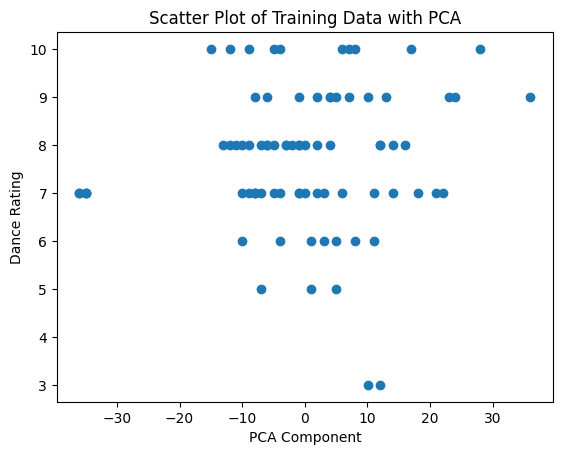

In [806]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA reduces the X values, dimensionality, into one numeric value

train_x = X[:80]
train_y = y[:80]

# Perform PCA with n_components=1 to reduce to a single dimension
pca = PCA(n_components=1)
X_pca = pca.fit_transform(train_x)

# Create a scatter plot using the single PCA component
plt.scatter(X_pca, train_y)
plt.xlabel('PCA Component')
plt.ylabel('Dance Rating')
plt.title('Scatter Plot of Training Data with PCA')
plt.show()


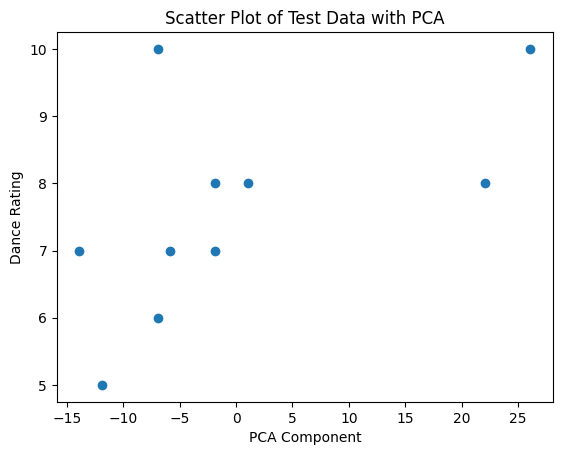

In [807]:
# plotting the test data
test_x = X[80:]
test_y = y[80:]

# Perform PCA with n_components=1 to reduce to a single dimension
pca = PCA(n_components=1)
X_pca = test_X_pca = pca.fit_transform(test_x)

plt.scatter(X_pca, test_y)
plt.xlabel('PCA Component')
plt.ylabel('Dance Rating')
plt.title('Scatter Plot of Test Data with PCA')
plt.show()


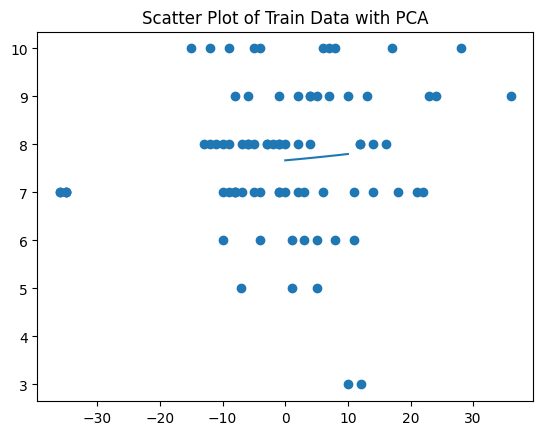

In [814]:
import numpy
import matplotlib.pyplot as plt

train_x = X[:80]
train_y = y[:80]

pca = PCA(n_components=1)
X_pca = pca.fit_transform(train_x)

x_pca_list = []

for x in X_pca:
    x_pca_list.append(x[0])

# create the model with the training data
# for existing members of the dance scene
# mymodel = numpy.poly1d(numpy.polyfit(x_pca_list, train_y, 2))
# for people coming into the dance scene
mymodel = numpy.poly1d(numpy.polyfit(x_pca_list, train_y, 2))

# 1 for oe x variable
# mymodel = numpy.poly1d(numpy.polyfit(x_pca_list, train_y, 1))

myline = numpy.linspace(0, 10, 100)

plt.scatter(X_pca, train_y)
plt.title('Scatter Plot of Train Data with PCA')
plt.plot(myline, mymodel(myline))
plt.show() 

In [815]:
from sklearn.metrics import r2_score

# the relationship between the test data and the model created using the training data
r2 = r2_score(test_y, mymodel(test_X_pca))
r2

0.11454454166384309

In [816]:
import numpy as np
import matplotlib.pyplot as plt


# Transform the test data using PCA
# test = [[40, 8,0,1,0,0,1,1]]
# test = [[25,1,8]]
# test = [[25,1,8, 3.5]]
# test = [[1]]
# normal model
# test = [[25,1,1,0,3.5]]
# newcomer model
test = [[25,1,1]]

test_pca = pca.transform(test)[0][0]

# Use the polynomial model for prediction
predicted_dance_rating = mymodel(test_pca)

print("Predicted Dance Rating:", predicted_dance_rating)


Predicted Dance Rating: 7.569916422620382


C:\Users\arytn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [817]:
# take the data from each row and use the model and compare it to the dance rating

# df_Test = df_ml[['Age', 'Zodiac Sign','Level', 'Dance Scene', 'Friendly Leads?', 'Friendly Follows?', 'Played an instrument', 'Played a Sport']]
# df_Test = df_ml[['Age', 'Gender', 'Zodiac Sign']]
# df_Test = df_ml[['Age', 'Gender', 'Zodiac Sign','Average Experience']]
# df_Test = df_ml[['Gender']]
# df_Test = df_ml[['Age','Gender', 'Played an instrument', 'Level', 'Average Experience']]
df_Test = df_ml[['Age','Gender', 'Played an instrument']]
actual_result = df_ml[['Dance Rating']]

row_list = [df_Test.iloc[0].tolist()]

test_pca = pca.transform(row_list)[0][0]

# Use the polynomial model for prediction
predicted_dance_rating = mymodel(test_pca)

print("Predicted Dance Rating:", predicted_dance_rating)
print("Actual Dance RatingL:", actual_result.iloc[0])

Predicted Dance Rating: 7.6059978996550575
Actual Dance RatingL: Dance Rating    9.0
Name: 0, dtype: float64


C:\Users\arytn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [818]:
import math

df_test_data = df_Test
counter = 0
for x in range(0, len(df_test_data)):
    
    row_list = [df_Test.iloc[x].tolist()]

    test_pca = pca.transform(row_list)[0][0]
    predicted_dance_rating = mymodel(test_pca)
    
    # print("Predicted Dance Rating:", predicted_dance_rating))
    # print("Actual Dance RatingL:", actual_result.iloc[x][0])

    if  math.floor(predicted_dance_rating) == actual_result.iloc[x][0]:
        counter += 1

print("Accuracy: ", round(counter/len(df_test_data)*100, 2),"%")

Accuracy:  30.0 %


C:\Users\arytn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
C:\Users\arytn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
C:\Users\arytn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
C:\Users\arytn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
C:\Users\arytn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
C:\Us

In [819]:
from sklearn.metrics import mean_absolute_error

import math

df_test_data = df_Test
data_list = []
predicted_list = []
counter = 0
for x in range(0, len(df_test_data)):
    
    row_list = [df_Test.iloc[x].tolist()]
    test_pca = pca.transform(row_list)[0][0]
    
    predicted_dance_rating = mymodel(test_pca)
    
    data_list.append(actual_result.iloc[x][0])
    
    predicted_list.append(math.floor(predicted_dance_rating))
    
    # print("Predicted Dance Rating:", math.ceil(predicted_dance_rating))
    # print("Actual Dance RatingL:", actual_result.iloc[x])

    if  math.floor(predicted_dance_rating) == actual_result.iloc[x][0]:
        counter += 1

# average abs diff between actual and perdicted values
mae  = mean_absolute_error(data_list, predicted_list)
print("Mean Absolute Error:", accuracy)


Mean Absolute Error: 1.1485148514851484


C:\Users\arytn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
C:\Users\arytn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
C:\Users\arytn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
C:\Users\arytn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
C:\Users\arytn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
C:\Us

In [820]:
# linear regression model accuracy

import math

df_test_data = df_Test
counter = 0
for x in range(0, len(df_test_data)):
    
    row_list = [df_Test.iloc[x].tolist()]
    
    predicted_dance_rating = regr.predict(row_list)

    
    # print("Predicted Dance Rating:", math.floor(predicted_dance_rating))
    # print("Actual Dance RatingL:", actual_result.iloc[x])

    if  math.ceil(predicted_dance_rating) == actual_result.iloc[x][0]:
        counter += 1

# linear regression model is less accurate
print("Accuracy: ", round(counter/len(df_test_data)*100, 2),"%")

Accuracy:  28.89 %


C:\Users\arytn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\arytn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\arytn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\arytn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\arytn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Line